### Khám phá Data 

In [11]:
import pandas as pd

# Đọc dữ liệu từ file CSV
file_path = 'Data.csv'
data = pd.read_csv(file_path, on_bad_lines='skip')


In [17]:
# Kiểm tra phân phối của cột 'strength' để xem có bao nhiêu mật khẩu có độ mạnh khác nhau
strength_distribution = data['strength'].value_counts()
# Chuẩn hóa phân phối để thể hiện dưới dạng phần trăm
strength_distribution_normalize = (strength_distribution / strength_distribution.sum()) * 100
print("Phân phối của độ mạnh mật khẩu trong dữ liệu gốc:")
print(strength_distribution)  # In ra phân phối của độ mạnh mật khẩu
print("Phân phối đã chuẩn hóa (%):")
print(strength_distribution_normalize)  # In ra phân phối đã chuẩn hóa dưới dạng phần trăm

Phân phối của độ mạnh mật khẩu trong dữ liệu gốc:
strength
1    496801
0     89702
2     83137
Name: count, dtype: int64
Phân phối đã chuẩn hóa (%):
strength
1    74.189266
0    13.395556
2    12.415178
Name: count, dtype: float64


In [18]:
# Xóa các hàng có giá trị bị thiếu trong cột 'password'
data_cleaned = data.dropna(subset=['password'])

# Chuyển đổi dữ liệu trong cột 'password' sang dạng chuỗi một cách an toàn
data_cleaned['password'] = data_cleaned['password'].astype(str)

# Kiểm tra lại dữ liệu sau khi xử lý
print(data_cleaned.info())
print(data_cleaned.head())

# Hàm trích xuất đặc trưng nâng cao từ mật khẩu
def extract_advanced_features(password):
    features = {
        'length': len(password),  # Độ dài của mật khẩu
        'uppercase_count': 0,     # Số ký tự viết hoa
        'lowercase_count': 0,     # Số ký tự viết thường
        'digit_count': 0,         # Số ký tự số
        'special_char_count': 0,  # Số ký tự đặc biệt
        'consecutive_digits_count': 0,  # Số nhóm ký tự số liên tiếp
        'consecutive_letters_count': 0,  # Số nhóm ký tự chữ cái liên tiếp
    }
    
    for i, char in enumerate(password):
        if char.isupper():
            features['uppercase_count'] += 1
        elif char.islower():
            features['lowercase_count'] += 1
        elif char.isdigit():
            features['digit_count'] += 1
        else:
            features['special_char_count'] += 1
        
        # Kiểm tra ký tự liên tiếp
        if i > 0:
            if char.isdigit() and password[i-1].isdigit():
                features['consecutive_digits_count'] += 1
            elif char.isalpha() and password[i-1].isalpha():
                features['consecutive_letters_count'] += 1
    
    # Tính số ký tự lặp lại và sự đa dạng của ký tự
    features['repeat_char_count'] = len(password) - len(set(password))
    features['char_variety'] = sum(1 for count in features.values() if count > 0)
    
    return features

# Áp dụng hàm trích xuất đặc trưng cho mỗi mật khẩu
data_cleaned = data_cleaned.assign(password_features=data_cleaned['password'].apply(extract_advanced_features))

# Chuyển đổi từ điển các đặc trưng thành các cột riêng biệt
feature_df = pd.DataFrame(data_cleaned['password_features'].tolist())

# Kết hợp dữ liệu gốc với các đặc trưng mới
result_df = pd.concat([data_cleaned.drop(['password_features'], axis=1), feature_df], axis=1)

# Chuyển đổi cột 'strength' sang kiểu số nguyên, thay thế NaN bằng giá trị mặc định
result_df['strength'] = result_df['strength'].fillna(-1).astype(int)

# Lưu kết quả vào file CSV
result_df.to_csv('created_feature_data.csv', index=False)

print("Dữ liệu với các đặc trưng đã được lưu vào 'created_feature_data.csv'")

# In thông tin về cột 'strength'
print("\nGiá trị duy nhất trong cột 'strength':")
print(result_df['strength'].value_counts(dropna=False))

C:\Users\User\AppData\Local\Temp\ipykernel_16984\2057792742.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['password'] = data_cleaned['password'].astype(str)


<class 'pandas.core.frame.DataFrame'>
Index: 669639 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669639 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
None
      password  strength
0     kzde5577         1
1     kino3434         1
2    visi7k1yr         1
3     megzy123         1
4  lamborghin1         1
Dữ liệu với các đặc trưng đã được lưu vào 'created_feature_data.csv'

Giá trị duy nhất trong cột 'strength':
strength
 1    496801
 0     89701
 2     83137
-1         1
Name: count, dtype: int64


Kết quả thu được từ hàm `extract_advanced_features` sẽ bao gồm các đặc trưng (features) sau đây từ mật khẩu:

1. **length**: Độ dài của mật khẩu.
2. **uppercase_count**: Số ký tự viết hoa trong mật khẩu.
3. **lowercase_count**: Số ký tự viết thường trong mật khẩu.
4. **digit_count**: Số ký tự số trong mật khẩu.
5. **special_char_count**: Số ký tự đặc biệt trong mật khẩu (ví dụ: @, #, $, v.v.).
6. **consecutive_digits_count**: Số nhóm ký tự số liên tiếp trong mật khẩu.
7. **consecutive_letters_count**: Số nhóm ký tự chữ cái liên tiếp trong mật khẩu.
8. **repeat_char_count**: Số ký tự lặp lại trong mật khẩu.
9. **char_variety**: Số loại ký tự khác nhau có trong mật khẩu (ví dụ: số, chữ hoa, chữ thường, ký tự đặc biệt).

Những đặc trưng này sẽ giúp đánh giá độ mạnh của mật khẩu dựa trên các yếu tố khác nhau liên quan đến cấu trúc và sự đa dạng của các ký tự trong mật khẩu.

## Chuẩn bị train model 


- Tách dữ liệu thành các biến đầu vào (features) và biến mục tiêu (target).
- Biến mục tiêu là cột `strength`, trong khi các biến đầu vào là các cột đặc trưng như `length`, `uppercase_count`, `lowercase_count`, `digit_count`, `special_char_count`, `consecutive_digits_count`, `consecutive_letters_count`, `repeat_char_count`, và `char_variety`.

In [10]:
import pandas as pd
import numpy as np

# Đọc dữ liệu từ file CSV
data = pd.read_csv('created_feature_data.csv')

# Hiển thị thông tin cơ bản về dataset
print("Thông tin cơ bản về dataset:")
print(data.info())

# Hiển thị 5 dòng đầu tiên của dataset
print("\n5 dòng đầu tiên của dataset:")
print(data.head())

# Kiểm tra giá trị null
print("\nSố lượng giá trị null trong mỗi cột:")
print(data.isnull().sum())

# Kiểm tra giá trị duy nhất trong cột 'strength'
print("\nGiá trị duy nhất trong cột 'strength':")
print(data['strength'].value_counts())

# Kiểm tra thống kê mô tả của các cột số
print("\nThống kê mô tả của các cột số:")
print(data.describe())

# Kiểm tra giá trị min, max của các cột
print("\nGiá trị min, max của các cột:")
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        print(f"{column}: Min = {data[column].min()}, Max = {data[column].max()}")

# Kiểm tra xem có giá trị âm trong các cột không nên âm
columns_to_check = ['length', 'uppercase_count', 'lowercase_count', 'digit_count', 
                    'special_char_count', 'consecutive_digits_count', 
                    'consecutive_letters_count', 'repeat_char_count', 
                    'char_variety']

print("\nKiểm tra giá trị âm trong các cột:")
for column in columns_to_check:
    negative_count = (data[column] < 0).sum()
    if negative_count > 0:
        print(f"{column}: {negative_count} giá trị âm")
    else:
        print(f"{column}: Không có giá trị âm")

Thông tin cơ bản về dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   password                   669639 non-null  object 
 1   strength                   669640 non-null  int64  
 2   length                     669639 non-null  float64
 3   uppercase_count            669639 non-null  float64
 4   lowercase_count            669639 non-null  float64
 5   digit_count                669639 non-null  float64
 6   special_char_count         669639 non-null  float64
 7   consecutive_digits_count   669639 non-null  float64
 8   consecutive_letters_count  669639 non-null  float64
 9   repeat_char_count          669639 non-null  float64
 10  char_variety               669639 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 56.2+ MB
None

5 dòng đầu tiên của dataset:
      password  stren

Phân tích Data

1. Giá trị NaN (Null):
   Có một số giá trị null trong dataset:
   ```
   password                     1
   length                       1
   uppercase_count              1
   lowercase_count              1
   digit_count                  1
   special_char_count           1
   consecutive_digits_count     1
   consecutive_letters_count    1
   repeat_char_count            1
   char_variety                 1
   ```
   Mỗi cột (trừ 'strength') đều có một giá trị null. 

2. Giá trị bất thường trong cột 'strength':
   Có một giá trị -1 trong cột 'strength', trong khi các giá trị khác là 0, 1, và 2. Điều này có thể là một lỗi dữ liệu.

3. Giá trị max bất thường:
   Một số cột có giá trị max rất cao so với trung bình, ví dụ:
   - length: Max = 220.0
   - uppercase_count: Max = 80.0
   - lowercase_count: Max = 164.0
   - consecutive_letters_count: Max = 165.0
   - repeat_char_count: Max = 168.0

   Những giá trị này có thể là outliers hoặc lỗi dữ liệu.

4. Phân phối không đồng đều của 'strength':
   Có sự mất cân bằng lớn giữa các lớp trong cột 'strength':
   ```
   1    496801
   0     89701
   2     83137
   -1         1
   ```
   Điều này có thể ảnh hưởng đến hiệu suất của mô hình.

Để giải quyết các vấn đề này: 

1. Sử dụng Imputer để xử lý các giá trị null. 
2. Xem xét loại bỏ hoặc sửa đổi giá trị -1 trong cột 'strength'.
3. Kiểm tra và có thể loại bỏ các outliers.
4. Cân nhắc sử dụng kỹ thuật cân bằng lớp để xử lý sự mất cân bằng trong cột 'strength'.
> 
Việc sử dụng Imputer là cần thiết để xử lý các giá trị null trước khi đưa dữ liệu vào mô hình. 

Chúng ta loại bỏ NaN ngay trong dữ liệu. 
```python
# Đọc dữ liệu từ file CSV
data = pd.read_csv('created_feature_data.csv')

# Loại bỏ các hàng chứa giá trị NaN
data_cleaned = data.dropna()

# Kiểm tra lại xem còn giá trị NaN không
print("Số lượng giá trị NaN sau khi loại bỏ:")
print(data_cleaned.isnull().sum())
```

Nếu bài toán có nhiều NaN thì có thể xài 
```python
# Khởi tạo SimpleImputer để xử lý giá trị NaN
imputer = SimpleImputer(strategy='mean')

# Áp dụng imputer
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
```
`mean` strategy để điền vào data trống

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib
import os

# Đọc dữ liệu từ file CSV
data = pd.read_csv('created_feature_data.csv')

# Tách dữ liệu thành biến đầu vào và biến mục tiêu
X = data[['length', 'uppercase_count', 'lowercase_count', 'digit_count', 
           'special_char_count', 'consecutive_digits_count', 
           'consecutive_letters_count', 'repeat_char_count', 
           'char_variety']]
y = data['strength']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo SimpleImputer để xử lý giá trị NaN
imputer = SimpleImputer(strategy='mean')

# Áp dụng imputer
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Khởi tạo và áp dụng chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Khởi tạo mô hình Logistic Regression
model = LogisticRegression(multi_class='ovr', max_iter=1000)

# Huấn luyện mô hình
model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Đánh giá mô hình
print("Độ chính xác:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Độ chính xác: 0.7588331043545786
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.29      0.02      0.03     17999
           1       0.78      0.96      0.86     99267
           2       0.60      0.38      0.47     16661

    accuracy                           0.76    133928
   macro avg       0.42      0.34      0.34    133928
weighted avg       0.69      0.76      0.70    133928



c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Lưu model sau khi Train

In [4]:

# Lưu mô hình Logistic Regression
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(model, 'models/password_strength_model_lr.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

print("Mô hình Logistic Regression và scaler đã được lưu vào thư mục 'models'")

Mô hình Logistic Regression và scaler đã được lưu vào thư mục 'models'


#### Test nhanh

In [8]:
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler

# Hàm trích xuất đặc trưng từ mật khẩu (đã định nghĩa trước đó)
def extract_advanced_features(password):
    features = {
        'length': len(password),
        'uppercase_count': sum(1 for c in password if c.isupper()),
        'lowercase_count': sum(1 for c in password if c.islower()),
        'digit_count': sum(1 for c in password if c.isdigit()),
        'special_char_count': sum(1 for c in password if not c.isalnum()),
        'consecutive_digits_count': sum(1 for i in range(1, len(password)) if password[i].isdigit() and password[i-1].isdigit()),
        'consecutive_letters_count': sum(1 for i in range(1, len(password)) if password[i].isalpha() and password[i-1].isalpha()),
        'repeat_char_count': len(password) - len(set(password)),
        'char_variety': sum(1 for count in [sum(1 for c in password if c.isupper()), 
                                            sum(1 for c in password if c.islower()),
                                            sum(1 for c in password if c.isdigit()),
                                            sum(1 for c in password if not c.isalnum())] if count > 0)
    }
    return features

# Hàm kiểm tra độ mạnh của mật khẩu
def test_password_strength(password):
    # Tải mô hình và scaler đã lưu
    model = joblib.load('models/password_strength_model_lr.pkl')
    scaler = joblib.load('models/scaler.pkl')
    
    # Trích xuất đặc trưng từ mật khẩu
    features = extract_advanced_features(password)
    
    # Chuyển đổi đặc trưng thành mảng numpy
    feature_array = np.array([list(features.values())])
    
    # Chuẩn hóa đặc trưng
    feature_scaled = scaler.transform(feature_array)
    
    # Dự đoán độ mạnh của mật khẩu
    strength = model.predict(feature_scaled)[0]
    
    # Chuyển đổi độ mạnh thành mô tả
    strength_description = {
        0: "Yếu",
        1: "Trung Bình",
        2: "Mạnh",
    }
    
    return strength_description.get(strength, "Không xác định")

# Sử dụng hàm để kiểm tra mật khẩu
password = "12"
result = test_password_strength(password)
print(f"Độ mạnh của mật khẩu: {result}")

Độ mạnh của mật khẩu: Yếu


### Naive Bayes Model 

In [9]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib
import os

# Đọc dữ liệu từ file CSV
data = pd.read_csv('created_feature_data.csv')

# Tách dữ liệu thành biến đầu vào và biến mục tiêu
X = data[['length', 'uppercase_count', 'lowercase_count', 'digit_count', 
           'special_char_count', 'consecutive_digits_count', 
           'consecutive_letters_count', 'repeat_char_count', 
           'char_variety']]
y = data['strength']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo SimpleImputer để xử lý giá trị NaN (giá trị rỗng)
imputer = SimpleImputer(strategy='mean')

# Áp dụng imputer
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Khởi tạo và áp dụng chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Naive Bayes Classifier
print("\nNaive Bayes Classifier:")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_pred = nb_model.predict(X_test_scaled)
print("Độ chính xác:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

# Lưu mô hình Naive Bayes
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(nb_model, 'models/password_strength_model_nb.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

print("Mô hình Naive Bayes, scaler và imputer đã được lưu vào thư mục 'models'")


Naive Bayes Classifier:
Độ chính xác: 0.775692909623081


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.52      0.48      0.50     17999
           1       0.86      0.86      0.86     99267
           2       0.55      0.59      0.57     16661

    accuracy                           0.78    133928
   macro avg       0.48      0.48      0.48    133928
weighted avg       0.77      0.78      0.77    133928

Mô hình Naive Bayes, scaler và imputer đã được lưu vào thư mục 'models'


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib
import os

# Đọc dữ liệu từ file CSV
data = pd.read_csv('created_feature_data.csv')

# Tách dữ liệu thành biến đầu vào và biến mục tiêu
X = data[['length', 'uppercase_count', 'lowercase_count', 'digit_count', 
           'special_char_count', 'consecutive_digits_count', 
           'consecutive_letters_count', 'repeat_char_count', 
           'char_variety']]
y = data['strength']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo SimpleImputer để xử lý giá trị NaN
imputer = SimpleImputer(strategy='mean')

# Áp dụng imputer
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Khởi tạo và áp dụng chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Random Forest Classifier
print("Random Forest Classifier:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
print("Độ chính xác:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Lưu mô hình Random Forest
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(rf_model, 'models/password_strength_model_rf.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

print("Mô hình Random Forest, scaler và imputer đã được lưu vào thư mục 'models'")

Random Forest Classifier:
Độ chính xác: 0.8080610477271369


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.61      0.61      0.61     17999
           1       0.88      0.89      0.88     99267
           2       0.60      0.55      0.57     16661

    accuracy                           0.81    133928
   macro avg       0.52      0.51      0.52    133928
weighted avg       0.81      0.81      0.81    133928

Mô hình Random Forest, scaler và imputer đã được lưu vào thư mục 'models'


Lúc run demo có bug liên quan đến việc không tương thích của sklearn lúc train model và lúc demo. Do lúc train xài python 11, lúc demo trong .venv xài python 12

```terminal
   python -c "import sklearn; print(sklearn.__version__)"
```
1.5.2

In [4]:
import sklearn
print(sklearn.__version__)

1.5.0


#### Biểu diễn thêm trực quan hoá thêm <PHẦN MODEL ĐÃ TRAIN XONG Ở TRÊN RỒI - PHẦN BIỂU DIỄN THÊM>

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib
import os
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Trực quan hoá Logistics Regression 


Logistic Regression:
Độ chính xác: 0.7642837942775222


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.47      0.05      0.09     17999
           1       0.78      0.95      0.86     99267
           2       0.60      0.42      0.50     16661

    accuracy                           0.76    133928
   macro avg       0.46      0.36      0.36    133928
weighted avg       0.72      0.76      0.71    133928



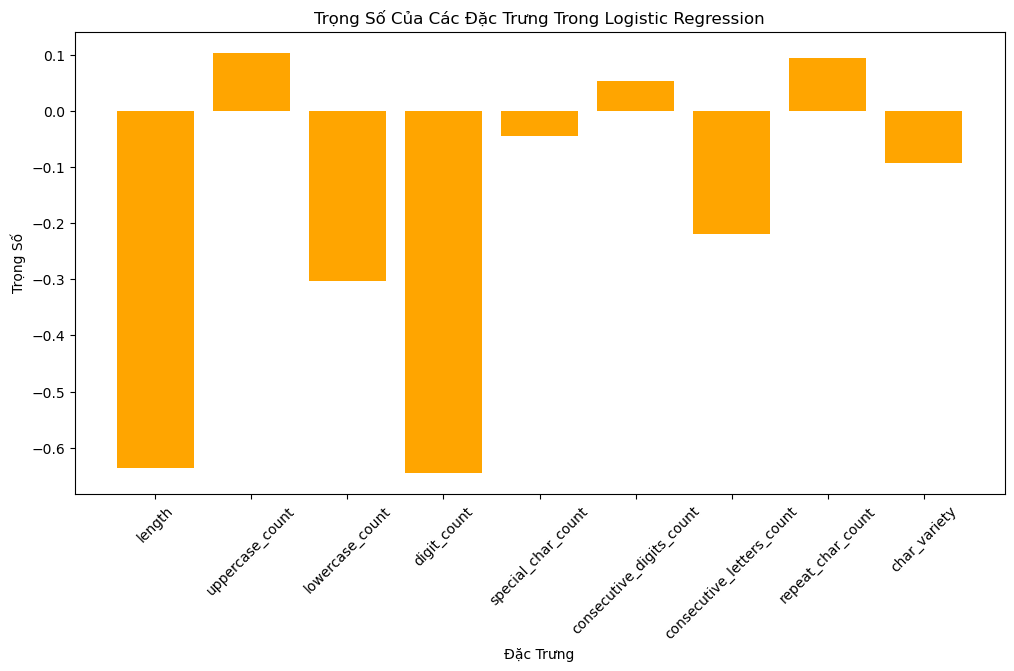

Phần chặn (Intercept): [-0.71481848  1.48196596 -0.76714748]


In [8]:
# Logistic Regression
print("\nLogistic Regression:")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print("Độ chính xác:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

# Trực quan hóa trọng số của các đặc trưng (Logistic Regression)
plt.figure(figsize=(12, 6))
plt.bar(X.columns, lr_model.coef_[0], color='orange')
plt.title('Trọng Số Của Các Đặc Trưng Trong Logistic Regression')
plt.xlabel('Đặc Trưng')
plt.ylabel('Trọng Số')
plt.xticks(rotation=45)
plt.show()

print("Phần chặn (Intercept):", lr_model.intercept_)

Trực quan hoá Naive Bayes


Naive Bayes Classifier:
Độ chính xác: 0.775692909623081


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.52      0.48      0.50     17999
           1       0.86      0.86      0.86     99267
           2       0.55      0.59      0.57     16661

    accuracy                           0.78    133928
   macro avg       0.48      0.48      0.48    133928
weighted avg       0.77      0.78      0.77    133928



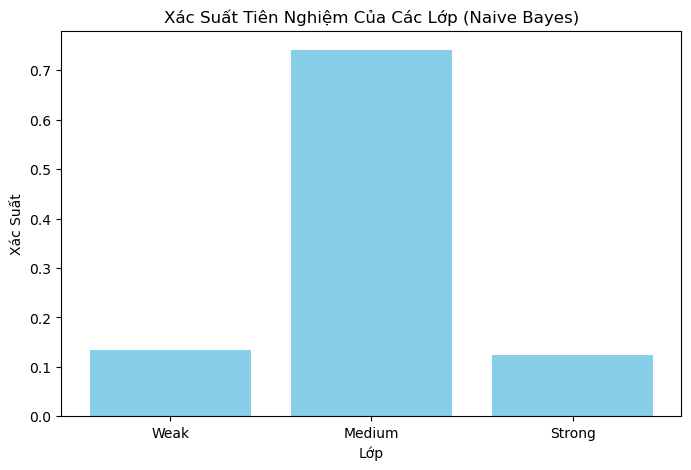

In [7]:
# Naive Bayes Classifier
print("\nNaive Bayes Classifier:")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_pred = nb_model.predict(X_test_scaled)
print("Độ chính xác:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

# Xác suất tiên nghiệm của các lớp (Naive Bayes)
plt.figure(figsize=(8, 5))
plt.bar(['Weak', 'Medium', 'Strong'], nb_model.class_prior_, color='skyblue')
plt.title('Xác Suất Tiên Nghiệm Của Các Lớp (Naive Bayes)')
plt.xlabel('Lớp')
plt.ylabel('Xác Suất')
plt.show()

Trực quan hoá Random Forest

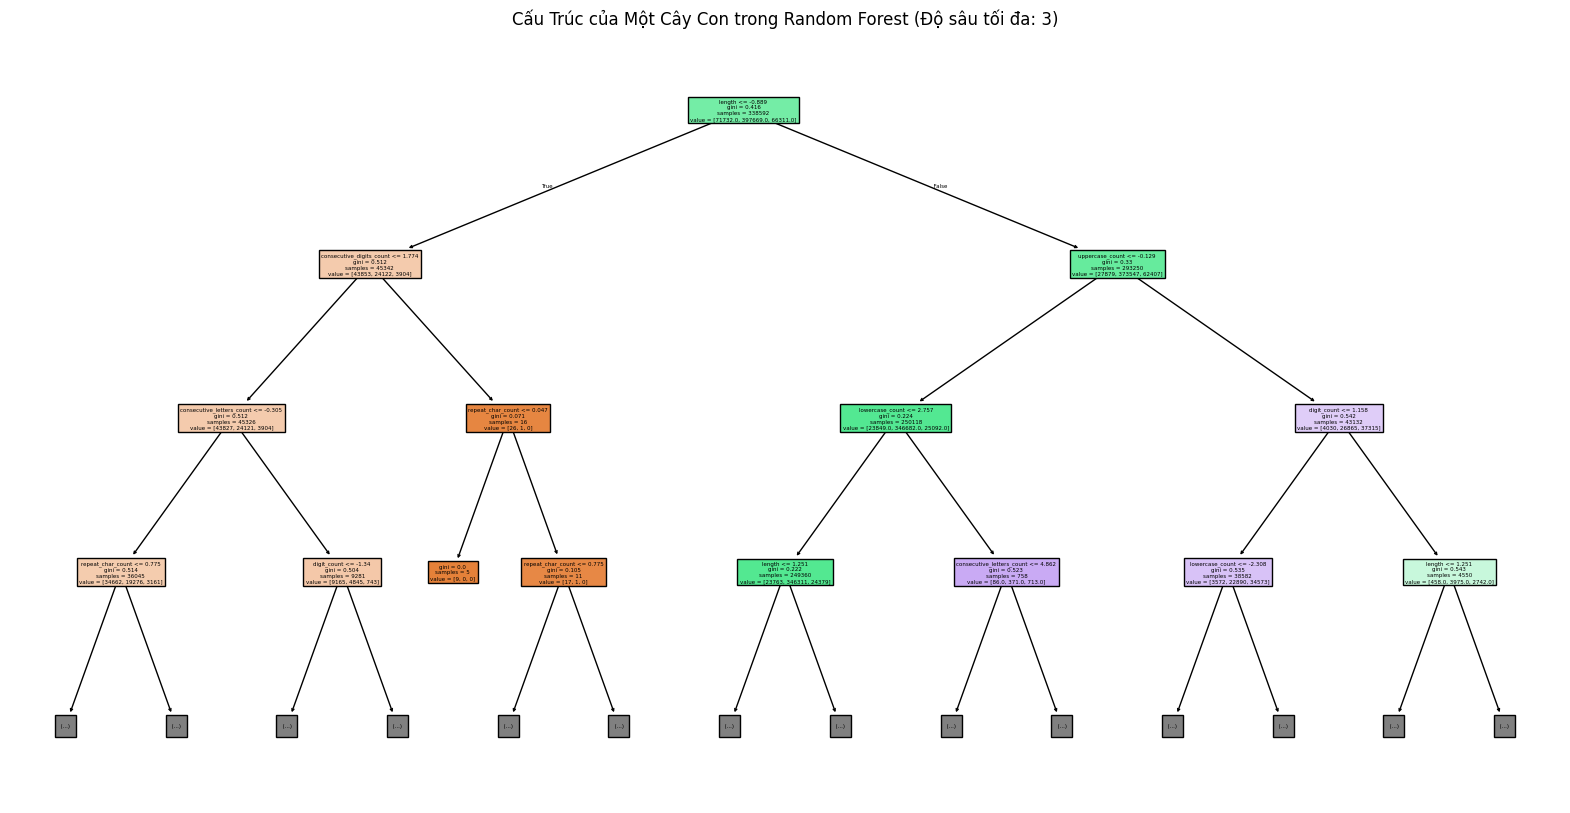

Feature Importances:
 length                       0.510303
uppercase_count              0.192338
consecutive_letters_count    0.085555
lowercase_count              0.053115
char_variety                 0.048519
digit_count                  0.041787
repeat_char_count            0.031372
consecutive_digits_count     0.028689
special_char_count           0.008321
dtype: float64


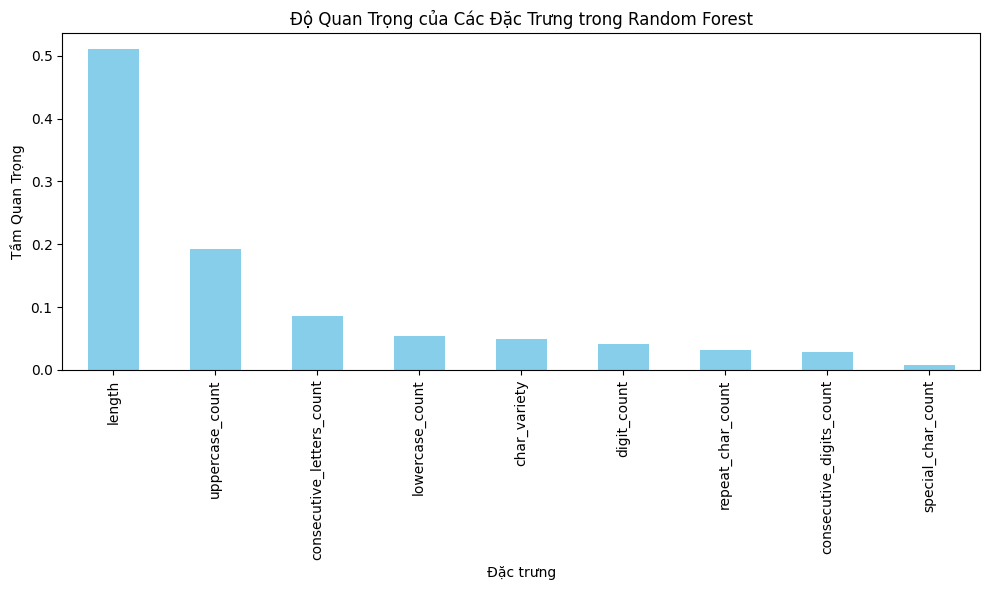

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Hiển thị cấu trúc của một cây con trong Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, max_depth=3)
plt.title("Cấu Trúc của Một Cây Con trong Random Forest (Độ sâu tối đa: 3)")
plt.show()

# Phân tích độ quan trọng của các đặc trưng
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

# Trực quan hóa độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.xlabel('Đặc trưng')
plt.ylabel('Tầm Quan Trọng')
plt.title('Độ Quan Trọng của Các Đặc Trưng trong Random Forest')
plt.tight_layout()
plt.show()